# Microsoft Recommendations

In [1]:
# %run code/add_data.py
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,}'.format
from pandasql import sqldf
import json
import requests
import os
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
#os.system("ls data/zippedData | grep sv > file_list.txt")




In [2]:
%run code/data_preparations.py
csv_dict.keys()


dict_keys(['bom.movie_gross', 'imdb.name.basics', 'imdb.title.akas', 'imdb.title.basics', 'imdb.title.crew', 'imdb.title.principals', 'imdb.title.ratings', 'rt.movie_info', 'rt.reviews', 'tmdb.movies', 'tmdb_genres', 'tmdb_imdb_gross', 'tmdb_imdb_gross_full', 'tmdb_movie_ids', 'tn.movie_budgets'])

In [3]:
full_profit_df=full_profit_df.query("year > 1990 and year < 2022 & runtime>60")
full_profit_df.head(2)
#csv_dict.get('tmdb_imdb_gross_full').info()

,id,tconst,title,release_date,revenue,budget,net_profit,year,vote_average,popularity,vote_count,runtime,genre_id
0,5,tt0113101,Four Rooms,1995-12-09,"4,257,354.0","4,000,000.0","257,354.0",1995,5,15,2123,98.0,"[80, 35]"
2,13,tt0109830,Forrest Gump,1994-07-06,"677,387,716.0","55,000,000.0","622,387,716.0",1994,8,62,22311,142.0,"[35, 18, 10749]"


In [4]:
full_profit_by_genre.head(2)

,id,tconst,title,release_date,revenue,budget,net_profit,year,vote_average,popularity,vote_count,runtime,genre_id,genre
0,5,tt0113101,Four Rooms,1995-12-09,"4,257,354.0","4,000,000.0","257,354.0",1995,5,15,2123,98.0,80,Crime
1,93,tt0052561,Anatomy of a Murder,1959-07-01,"8,000,000.0","2,000,000.0","6,000,000.0",1959,7,16,693,161.0,80,Crime


In [5]:
full_profit_df=full_profit_df.query("year > 1990 and year < 2022 & runtime>60")
genre_summary_df=full_profit_by_genre.groupby(['genre'], as_index=False).mean().sort_values(by="revenue", ascending=False)[['genre','revenue']]

year_summary_df=full_profit_df.groupby(['year'], as_index=False).mean().sort_values(by="year")[['year','revenue']]
year_summary_df=year_summary_df[(year_summary_df["year"]>1995) & (year_summary_df["year"]<2022) ]
year_summary_df.head()

full_profit_df["year"]=full_profit_df["year"].astype(int)

#full_profit_year_df=full_profit_df.query("year > 1990 and year < 2022 & runtime>60")

In [6]:

full_profit_vote_df=full_profit_df.query("vote_count>200 & vote_count<20550").copy()
full_profit_vote_df.dropna(subset=["vote_count"], inplace=True)


full_profit_runtime_df=full_profit_df.query("runtime<200 & runtime>60 & revenue<1500000000").copy()
full_profit_runtime_df.dropna(subset=["runtime"], inplace=True)


full_profit_avgvote_df=full_profit_df.query("vote_average>0").copy()
full_profit_avgvote_df.dropna(subset=["vote_average"], inplace=True)

full_profit_pop_df=full_profit_df.query("popularity<220 & revenue<1500000000").copy()
full_profit_pop_df.dropna(subset=["popularity"], inplace=True)

In [7]:
!ls images


misc_profit_correlations.png
profit_by_genre.png
profit_by_year.png


In [25]:
None

In [9]:
None

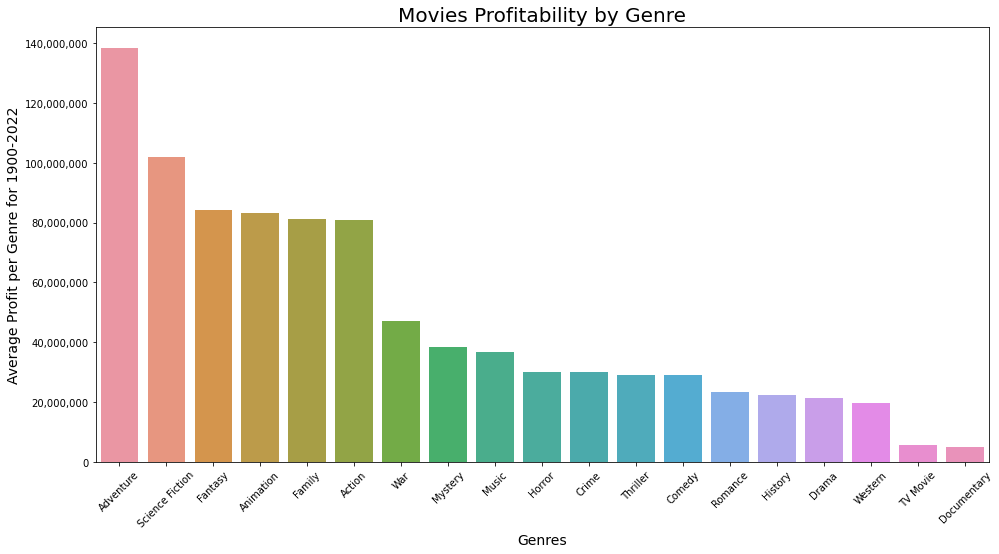

In [10]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)

num_of_ticks=list(range(len(genre_summary_df['genre'])))

fig,ax=plt.subplots(  figsize=(16,8))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

sns.barplot(x='genre', y='revenue', data=genre_summary_df, ax=ax);
ax.set_xticks(num_of_ticks);
ax.set_xticklabels(list(genre_summary_df['genre']),  rotation=45);
ax.set_title("Movies Profitability by Genre", fontsize=20 )
ax.set_ylabel("Average Profit per Genre for 1900-2022", fontsize=14)
ax.set_xlabel("Genres", fontsize=14);


fig.savefig('images/profit_by_genre.png')

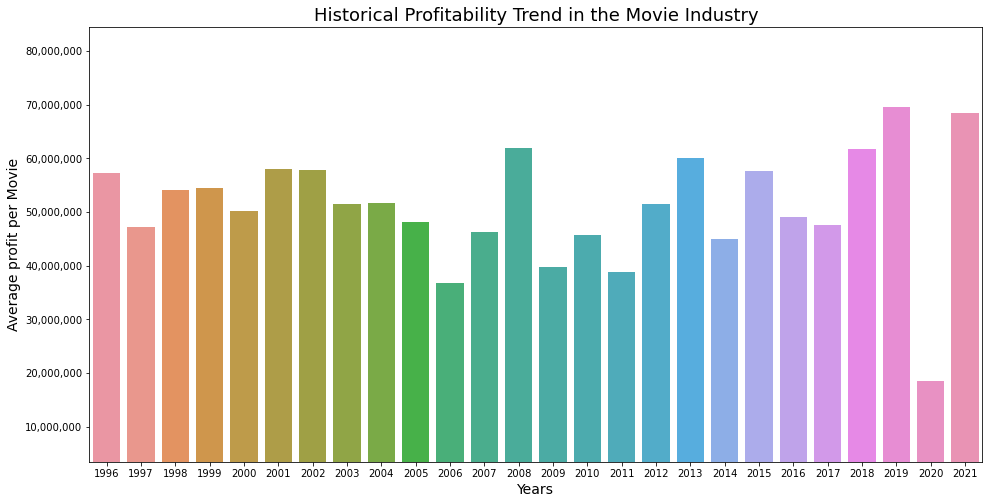

In [11]:
fig,ax=plt.subplots(  figsize=(16,8))

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

sns.barplot(x='year', y='revenue', data=year_summary_df, ax=ax);
#sns.barplot(x='year', y='budget', data=full_profit_year_df, ax=ax);

ax.set_ylim(min(year_summary_df['revenue'])-15000000, max(year_summary_df['revenue'])+15000000);


ax.set_title("Historical Profitability Trend in the Movie Industry", fontsize=18 )
ax.set_ylabel("Average profit per Movie", fontsize=14)
ax.set_xlabel("Years", fontsize=14);

fig.savefig('images/profit_by_year.png')

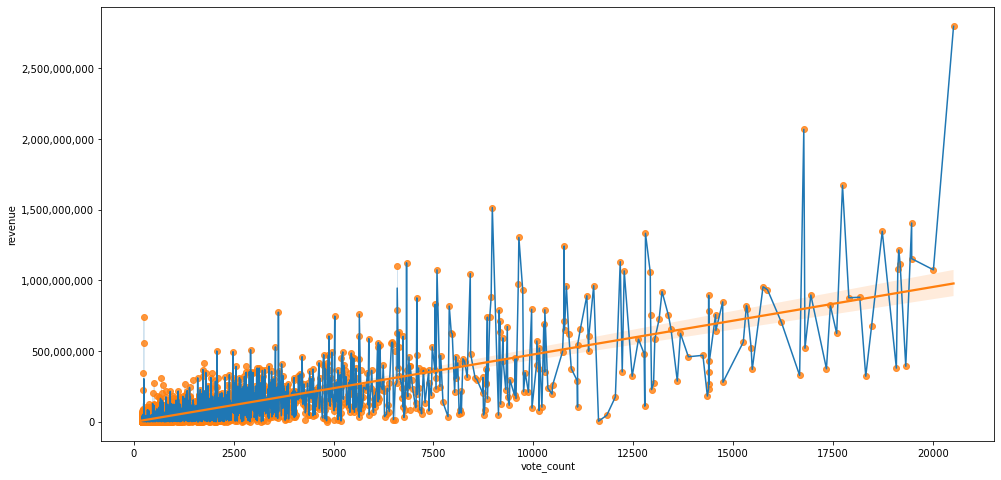

In [19]:
fig,ax=plt.subplots(  figsize=(16,8))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#full_profit_pop_df=full_profit_df.query("popularity>20 and popularity<110")


#full_profit_pop_df=full_profit_df.query("popularity>20 and popularity<110")
#sns.lineplot(x='vote_count', y='revenue', data=full_profit_pop_df, ax=ax);


sns.lineplot(x='vote_count', y='revenue', data=full_profit_vote_df, ax=ax);
sns.regplot(x='vote_count', y='revenue', data=full_profit_vote_df, ax=ax);



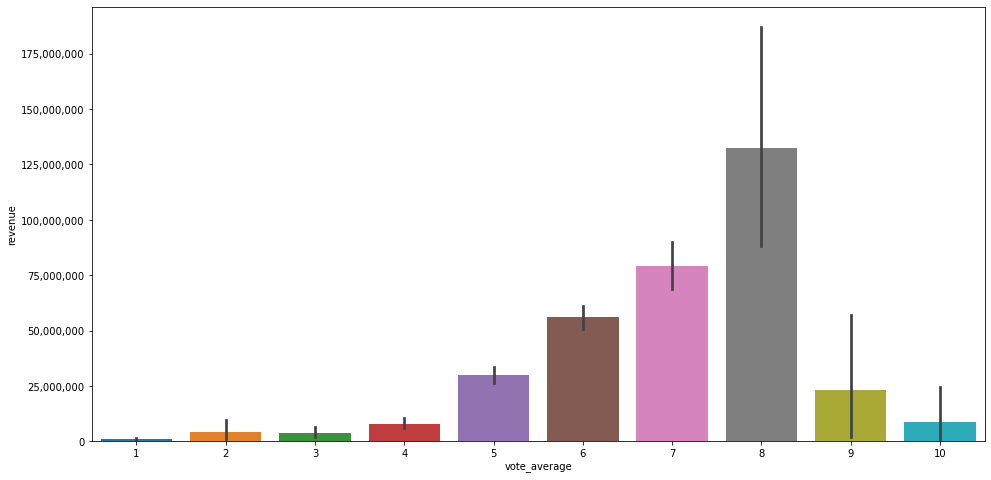

In [13]:
fig,ax=plt.subplots(  figsize=(16,8))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

sns.barplot(x='vote_average', y='revenue', data=full_profit_avgvote_df, ax=ax);

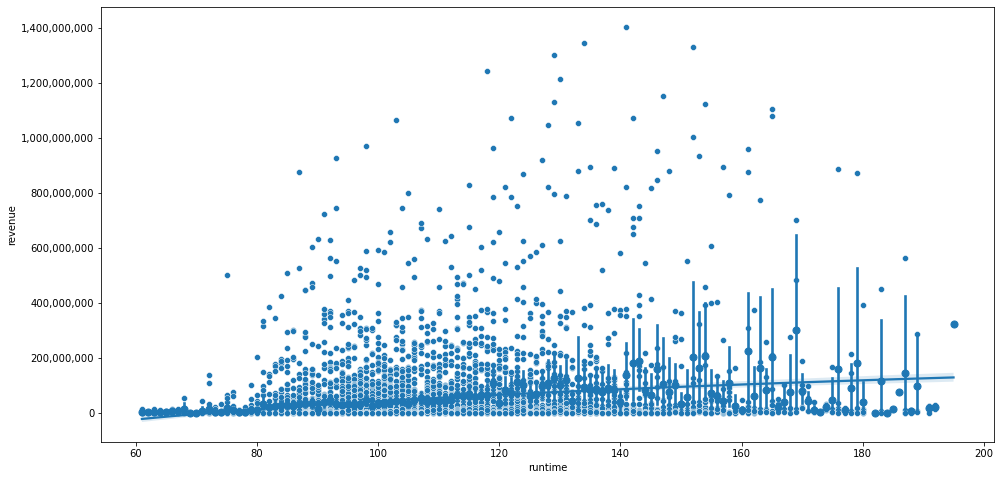

In [22]:
fig,ax=plt.subplots(  figsize=(16,8))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


sns.scatterplot(x='runtime', y='revenue', data=full_profit_runtime_df, ax=ax);

sns.regplot(x='runtime', y='revenue', data=full_profit_runtime_df, ax=ax, x_estimator=np.mean, logx=True);



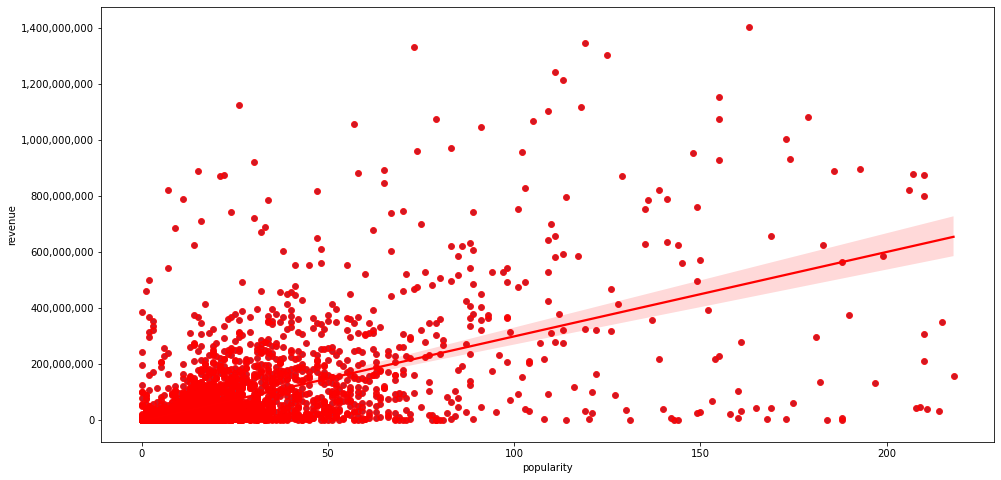

In [15]:
fig,ax=plt.subplots(  figsize=(16,8))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


sns.scatterplot(x='popularity', y='revenue', data=full_profit_pop_df, ax=ax);
sns.regplot(x='popularity', y='revenue', color='red', data=full_profit_pop_df);



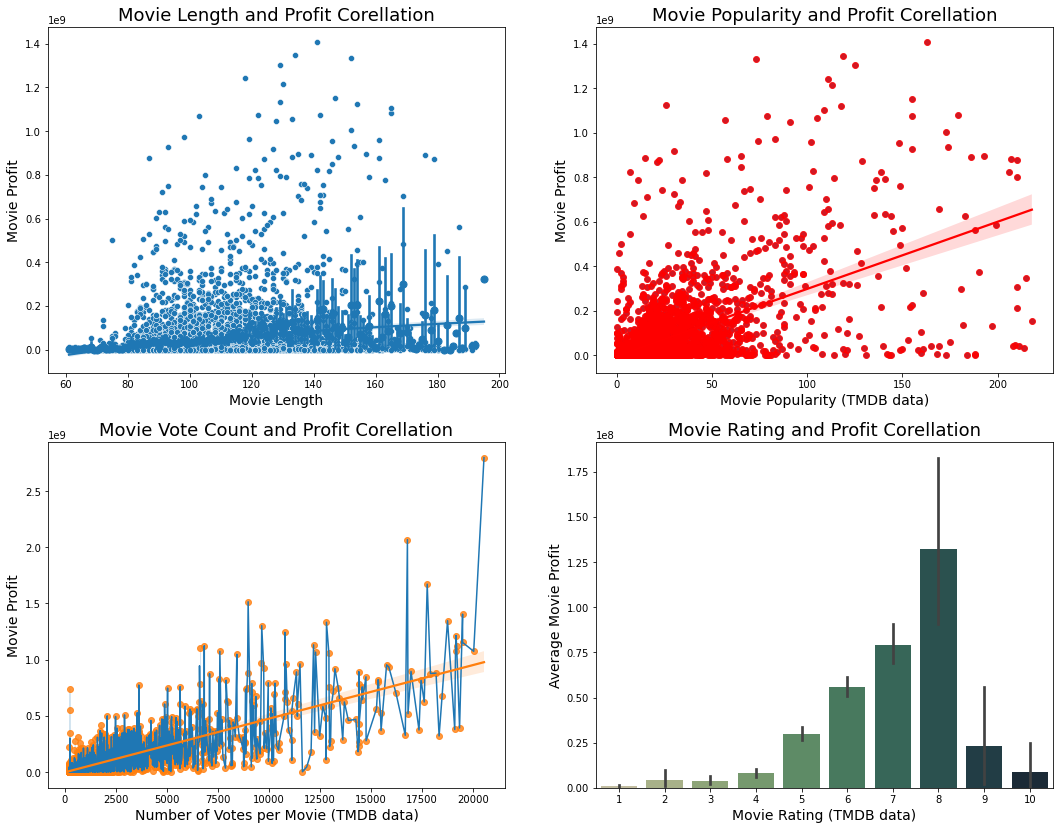

In [24]:

fig,ax=plt.subplots( nrows=2,ncols=2, figsize=(18,14))

pd.set_option('display.float_format', lambda x: '%.7f' % x)

num_of_ticks=list(range(len(genre_summary_df['genre'])))


sns.scatterplot(x='runtime', y='revenue', data=full_profit_runtime_df, ax=ax[0][0]);
sns.regplot(x='runtime', y='revenue', data=full_profit_runtime_df, ax=ax[0][0], x_estimator=np.mean, logx=True);


sns.scatterplot(x='popularity', y='revenue', data=full_profit_pop_df, ax=ax[0][1], palette="ch:r=-.5,l=.75");
sns.regplot(x='popularity', y='revenue', color='red', data=full_profit_pop_df, ax=ax[0][1]);

sns.barplot(x='vote_average', y='revenue', data=full_profit_avgvote_df, ax=ax[1][1], palette="ch:r=-.7,l=.75");

sns.lineplot(x='vote_count', y='revenue', data=full_profit_vote_df, ax=ax[1][0], palette="ch:r=-.3,l=.75");
sns.regplot(x='vote_count', y='revenue', data=full_profit_vote_df, ax=ax[1][0]);


ax[0][0].set_title("Movie Length and Profit Corellation", fontsize=18 )
ax[0][1].set_title("Movie Popularity and Profit Corellation", fontsize=18 )
ax[1][0].set_title("Movie Vote Count and Profit Corellation", fontsize=18 )
ax[1][1].set_title("Movie Rating and Profit Corellation", fontsize=18 )

ax[0][0].set_ylabel("Movie Profit", fontsize=14 )
ax[0][1].set_ylabel("Movie Profit", fontsize=14 )
ax[1][0].set_ylabel("Movie Profit", fontsize=14 )
ax[1][1].set_ylabel("Average Movie Profit", fontsize=14 )

ax[0][0].set_xlabel("Movie Length", fontsize=14 )
ax[0][1].set_xlabel("Movie Popularity (TMDB data)", fontsize=14 )
ax[1][0].set_xlabel("Number of Votes per Movie (TMDB data)", fontsize=14 )
ax[1][1].set_xlabel("Movie Rating (TMDB data)", fontsize=14 );



fig.savefig('images/misc_profit_correlations.png')



In [ ]:

type_info = csv_dict['rt.movie_info'][['id', 'director', 'runtime', 'rating']]

name_key = csv_dict['imdb.name.basics'][['nconst', 'primary_name']]
dir_time = type_info.merge(name_key, left_on = 'director', right_on = 'primary_name')
dir_time.dropna(subset=["runtime"], inplace=True)
dir_time['runtime'] = dir_time['runtime'].apply(clean_runtime)
dir_time.rating.notna().sum()

tconst_dir1=csv_dict['imdb.title.crew'][['tconst', 'directors']].copy()

movie_id_names_time = csv_dict['imdb.title.basics'][['tconst', 'primary_title', 'runtime_minutes']].copy()
movie_id_names_time.dropna(subset=["runtime_minutes"], inplace=True)

tconst_dir = movie_id_names_time.merge(tconst_dir1, how = 'inner', on = 'tconst')
tconst_dir.dropna(subset=["directors"], inplace=True)

tconst_dir['director']= tconst_dir['directors'].str.split(',')
tconst_dir.drop(columns = 'directors', inplace = True)
tconst_dir_each=tconst_dir.explode("director")

# In[749]:

dir_time.dropna(subset=["runtime"], inplace=True)
tconst_dir_time=dir_time.merge(tconst_dir_each, left_on=["nconst","runtime"], right_on=["director", "runtime_minutes"])
tconst_dir_time.drop(columns = ['director_x','director_y'], inplace=True)

full_profit_merge=full_profit_df.merge(tconst_dir_time[['runtime', 'rating', 'primary_name','tconst']], on=['tconst'], how="left")

#full_profit_merge["rating"].notna().sum()


In [27]:
csv_dict.keys()

dict_keys(['bom.movie_gross', 'imdb.name.basics', 'imdb.title.akas', 'imdb.title.basics', 'imdb.title.crew', 'imdb.title.principals', 'imdb.title.ratings', 'rt.movie_info', 'rt.reviews', 'tmdb.movies', 'tmdb_genres', 'tmdb_imdb_gross', 'tmdb_imdb_gross_full', 'tmdb_movie_ids', 'tn.movie_budgets'])

In [38]:
director_nconst=csv_dict.get("imdb.title.principals").query("category == 'director'")
full_profit_nconst_df=full_profit_df.merge(director_nconst, on=["nconst"])

In [35]:
csv_dict.get("imdb.title.principals")

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN
